# Algorytmy grafowe – minimalne drzewo rozpinające grafu

In [56]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

### Implementacja algorytmu Dijkstry-Prima poszukiwania minimalnego drzewa rozpinajacego graf oraz wdrozenie algorytmu na podstawie ponizszego grafu.

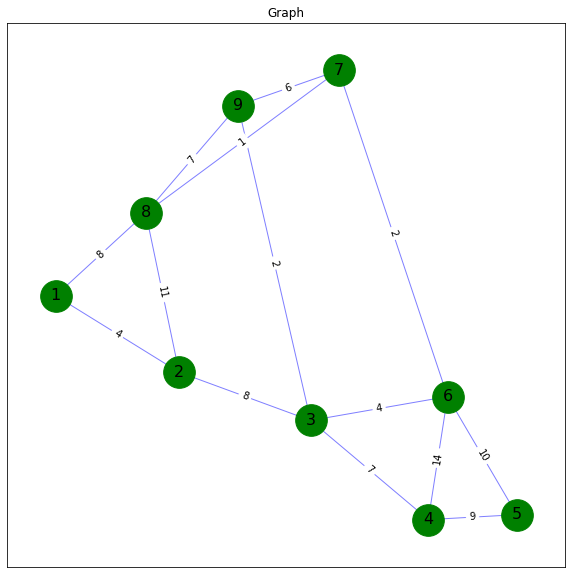

In [57]:
weights = [
    (1, 2, 4),
    (1, 8, 8),
    (2, 8, 11),
    (3, 2, 8),
    (3, 9, 2),
    (3, 6, 4),
    (3, 4, 7),
    (4, 5, 9),
    (4, 6, 14),
    (5, 6, 10),
    (6, 7, 2),
    (7, 9, 6),
    (7, 8, 1),
    (8, 9, 7),
]

G = nx.Graph()

G.add_weighted_edges_from(weights)

fig = plt.figure(figsize=(10, 10))

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, nodelist=[i for i in range(1, 10)], node_color='g', node_size=1000)
nx.draw_networkx_edges(G, pos, width=1,alpha=0.5,edge_color='b')

nx.draw_networkx_edge_labels(G, pos, font_size=10, edge_labels = nx.get_edge_attributes(G,'weight'))
nx.draw_networkx_labels(G, pos, font_size=16)

plt.title("Graph")
plt.show()

In [58]:
M = nx.to_numpy_array(G)
M

array([[ 0.,  4.,  8.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 4.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.],
       [ 8., 11.,  0.,  0.,  7.,  0.,  0.,  0.,  1.],
       [ 0.,  8.,  0.,  0.,  2.,  4.,  7.,  0.,  0.],
       [ 0.,  0.,  7.,  2.,  0.,  0.,  0.,  0.,  6.],
       [ 0.,  0.,  0.,  4.,  0.,  0., 14., 10.,  2.],
       [ 0.,  0.,  0.,  7.,  0., 14.,  0.,  9.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 10.,  9.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  6.,  2.,  0.,  0.,  0.]])

Algorytm

In [68]:

def dijkstraPrimAlgorithm(M, start):
    N = len(M)
    prevVertex = [0 for _ in range(N)]
    mst_edges = []
    sum = 0
    
    current = start - 1
    visited = []
    minimalNode = current

    while len(visited) < N:
        # Sprawdzam czy bierzacy wierzcholek zostal juz odwiedzony
        # Jest to konieczne w przypadku kiedy algorytm musi sie "wracac do poprzedniego wierzcholka"
        if current not in visited:
            visited.append(current)

        # Oznaczam wartosc minimalna bieganaca z bierzacego wierzcholka
        minimal = np.inf

        for i in range(N):
            # Iteruje po krawedziach wychodzacych i nie odwiedzonych
            print("Current: ", current+1)
            print("To: ", i+1)
            print("Weight: ", M[current][i])
            print("Minimal node: ", minimalNode)
            print()
            if M[current][i] > 0 and i not in visited:
                if minimal > M[current][i]:
                    minimalNode = i
                    minimal = M[current][i]
        
        # Jezeli znaleziono jakis wierzholek to oznaczam poprzedni wierzcholek oraz dodaje do mst
        if minimalNode != current:
            prevVertex[minimalNode] = current
            mst_edges.append((current, minimalNode))
            current = minimalNode
        else:
        # Jezeli nie znaleziono to oznaczam bierzocy jako poprzedni
            current = prevVertex[current]
        
    return mst_edges



Prezentacja minimalnego drzewa rozpinajacego graf.

Current:  1
To:  1
Weight:  0.0
Minimal node:  0

Current:  1
To:  2
Weight:  4.0
Minimal node:  0

Current:  1
To:  3
Weight:  8.0
Minimal node:  1

Current:  1
To:  4
Weight:  0.0
Minimal node:  1

Current:  1
To:  5
Weight:  0.0
Minimal node:  1

Current:  1
To:  6
Weight:  0.0
Minimal node:  1

Current:  1
To:  7
Weight:  0.0
Minimal node:  1

Current:  1
To:  8
Weight:  0.0
Minimal node:  1

Current:  1
To:  9
Weight:  0.0
Minimal node:  1

Current:  2
To:  1
Weight:  4.0
Minimal node:  1

Current:  2
To:  2
Weight:  0.0
Minimal node:  1

Current:  2
To:  3
Weight:  11.0
Minimal node:  1

Current:  2
To:  4
Weight:  8.0
Minimal node:  2

Current:  2
To:  5
Weight:  0.0
Minimal node:  3

Current:  2
To:  6
Weight:  0.0
Minimal node:  3

Current:  2
To:  7
Weight:  0.0
Minimal node:  3

Current:  2
To:  8
Weight:  0.0
Minimal node:  3

Current:  2
To:  9
Weight:  0.0
Minimal node:  3

Current:  4
To:  1
Weight:  0.0
Minimal node:  3

Current:  4
To:  2
Weight:  8.0
Minimal node:  3


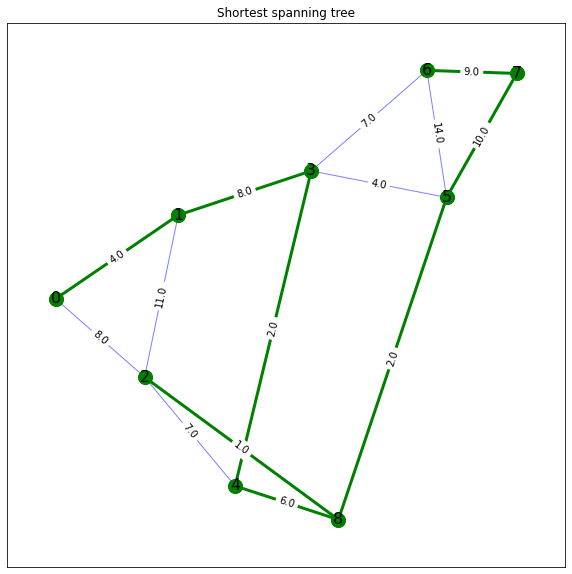

In [69]:
M = nx.to_numpy_array(G)
G_SST = nx.Graph(M)

sst = dijkstraPrimAlgorithm(M, 1)

fig = plt.figure(figsize=(10, 10))

pos = nx.spring_layout(G_SST)

nx.draw_networkx_nodes(G_SST, pos, node_color='g', node_size=200)
nx.draw_networkx_edges(G_SST, pos, width=1,alpha=0.5,edge_color='b')
nx.draw_networkx_edges(G_SST, pos, edgelist=sst, width=3, alpha=1, edge_color='g')

nx.draw_networkx_edge_labels(G_SST, pos, font_size=10, edge_labels = nx.get_edge_attributes(G_SST,'weight'))
nx.draw_networkx_labels(G_SST, pos, font_size=16)

plt.title("Shortest spanning tree")
plt.show()

### Istotne wlasnosci grafu z punktu widzenia dzialania algorytmu

Z punktu widzenia dzialania algorytmu wazne moze byc ilosc krawedzi grafu oraz spojnosc grafu.

### Idea algorytmu Kruskala

Algorytm Kruskala znajduje minialny las rozpinajacy w grafie wazonym nieskierowanym, jezeli graf jest spojny to znajduje minimalne drzewo rozpinajace. Minimalny las rozpinajacy to skonstruowanie drzew rozpinajacych dla polaczonych wierzcholkow. Algorytm zaklada dodawanie po kolei wierzcholkow ktore nie spowoduja utworzenia cyklu. Najwiekrza zlozonosc obliczeniowa ma etap sprawdzania czy dany wierzcholek utworzy cykl w grafie.

### Interpretacja praktyczna problemu MST

Rzeczywisty problem jaki mozemy opisac to jest zaprojektowanie drog w miasteczku tak aby zoptymalizowac dystans miedzy domami. Wagi wtedy beda reprezentowac odleglosc miedzy domami a wierzcholki beda reprezentowac budynki. Przykladowa wlasnoscia problemu jaka bedzie trzeba uwzglednic bedzie zdolnosc wybudowania drogi miedzy danymi budynkami. Na danej odleglosci moze wystepowac jakis obszar bagienny, obszar chroniony itp. Aby Uwzglednic ta wlasnoc mozemy zablokowac dane polaczenie lub zwiekrzyc wage danego polaczenia.